# Step 1: Preprocessing

Pick any dataset from the list, implement the **preprocessing** and justify the preprocessing steps,
**extract features** and justify the methods used, **select features** and justify the methods used. Some of this is done already in one of the previous assignments. You can reuse things. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Load the Data

In [22]:
graduates_df = pd.read_csv('graduation_dataset.csv')
graduates_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Explore data


In [8]:
graduates_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [9]:
graduates_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
graduates_df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [11]:
graduates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## Outliers

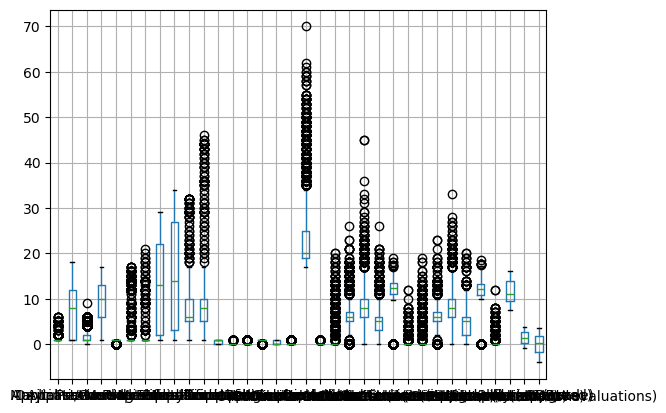

In [13]:
graduates_boxplot_df = graduates_df.boxplot()
plt.show()

In [19]:
graduates_df = graduates_df.drop('Target', axis=1)
Q1 = graduates_df.quantile(0.25)
Q3 = graduates_df.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = graduates_df[(graduates_df < lower_bound) | (graduates_df > upper_bound)]

num_outliers = len(outliers)

print(f'Number of outliers: {num_outliers}')
print(outliers)

Number of outliers: 4424
      Marital status  Application mode  Application order  Course  \
0                NaN               NaN                5.0     NaN   
1                NaN               NaN                NaN     NaN   
2                NaN               NaN                5.0     NaN   
3                NaN               NaN                NaN     NaN   
4                2.0               NaN                NaN     NaN   
...              ...               ...                ...     ...   
4419             NaN               NaN                6.0     NaN   
4420             NaN               NaN                NaN     NaN   
4421             NaN               NaN                NaN     NaN   
4422             NaN               NaN                NaN     NaN   
4423             NaN               NaN                NaN     NaN   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                            NaN                     NaN          NaN   


In [21]:
# Drop 'Target' column
#graduates_df = graduates_df.drop('Target', axis=1)

# Calculate Q1, Q3, and IQR for each column
Q1 = graduates_df.quantile(0.25)
Q3 = graduates_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for each column
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find the outliers in each column
outliers = ((graduates_df < lower_bound) | (graduates_df > upper_bound))

# Count the total number of outliers by summing up True values in the DataFrame
num_outliers = outliers.sum().sum()

print(f'Number of outliers: {num_outliers}')
print(graduates_df[outliers.any(axis=1)])


Number of outliers: 9816
      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
4                  2                12                  1       3   
5                  2                12                  1      17   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   


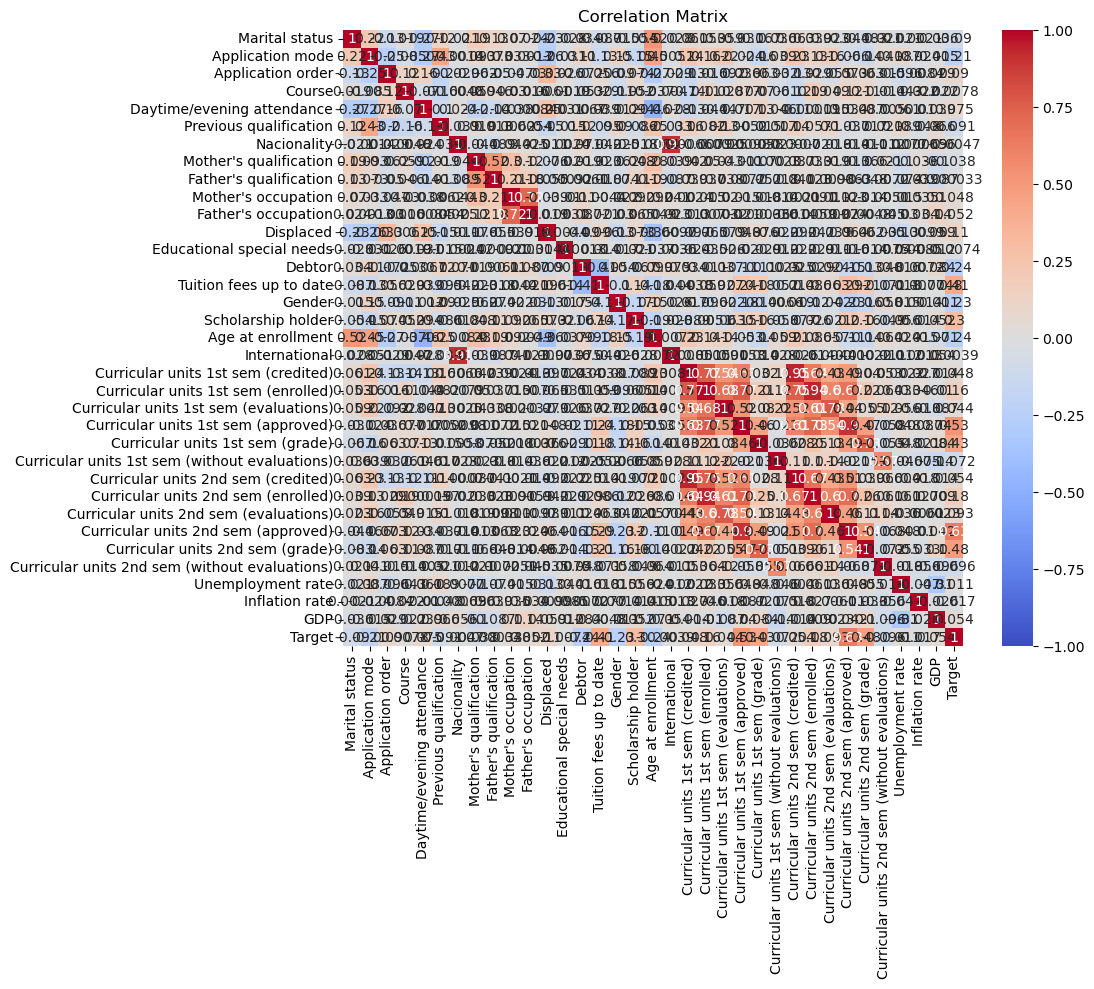

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
graduates_encoded_df = graduates_df.apply(LabelEncoder().fit_transform)

# Calculate the correlation matrix
correlation_matrix = graduates_encoded_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [27]:
# Encode categorical variables
graduates_encoded_df = graduates_df.apply(LabelEncoder().fit_transform)

# Calculate the correlation matrix
correlation_matrix = graduates_encoded_df.corr().abs()  # Take absolute value to identify strongest correlations

# Set the diagonal to zero to ignore self-correlation
np.fill_diagonal(correlation_matrix.values, 0)

# Unstack the matrix, sort by correlation, and select the top pairs
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)

# Display the top correlated pairs
top_correlations = sorted_correlations.head(30)
print("Top correlated attribute pairs:\n", top_correlations)


Top correlated attribute pairs:
 Curricular units 1st sem (credited)     Curricular units 2nd sem (credited)       0.945138
Curricular units 2nd sem (credited)     Curricular units 1st sem (credited)       0.945138
Curricular units 1st sem (enrolled)     Curricular units 2nd sem (enrolled)       0.943136
Curricular units 2nd sem (enrolled)     Curricular units 1st sem (enrolled)       0.943136
Nacionality                             International                             0.911724
International                           Nacionality                               0.911724
Curricular units 2nd sem (approved)     Curricular units 1st sem (approved)       0.903719
Curricular units 1st sem (approved)     Curricular units 2nd sem (approved)       0.903719
Curricular units 1st sem (evaluations)  Curricular units 2nd sem (evaluations)    0.780574
Curricular units 2nd sem (evaluations)  Curricular units 1st sem (evaluations)    0.780574
Curricular units 1st sem (credited)     Curricular units 

In [32]:
# Encode categorical variables
graduates_df = pd.read_csv('graduation_dataset.csv')

# Drop rows where the 'Target' column has the value "Enrolled"
graduates_df = graduates_df[graduates_df["Target"] != "Enrolled"]

# Alternatively, using the drop method
# graduates_df = graduates_df.drop(graduates_df[graduates_df["Target"] == "Enrolled"].index)


graduates_encoded_df = graduates_df.apply(LabelEncoder().fit_transform)

# Calculate the correlation matrix
correlation_matrix = graduates_encoded_df.corr()

# Select correlations with the 'Target' column, sort by absolute value, and exclude 'Target' itself
target_correlations = correlation_matrix["Target"].abs().sort_values(ascending=False).drop("Target")

# Display the top correlated attributes with 'Target'
print("Attributes most correlated with 'Target':\n", target_correlations)


Attributes most correlated with 'Target':
 Curricular units 2nd sem (approved)               0.657082
Curricular units 1st sem (approved)               0.555731
Curricular units 2nd sem (grade)                  0.498801
Curricular units 1st sem (grade)                  0.457172
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Age at enrollment                                 0.267702
Debtor                                            0.267207
Gender                                            0.251955
Application mode                                  0.233888
Curricular units 2nd sem (enrolled)               0.183169
Curricular units 1st sem (enrolled)               0.161567
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119198
Curricular units 2nd sem (without evaluations)    0.105478
Previous qualification                            0.102795
Marital statu